In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns',300)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', None)

# Importation des données

In [2]:
df = pd.read_csv('visites_6.csv', sep=';', low_memory=False)

# Taille de nos données

In [3]:
#238 variables + 204 variables transformées ajoutées par Thierry
df.shape

(119567, 442)

# Visualisations

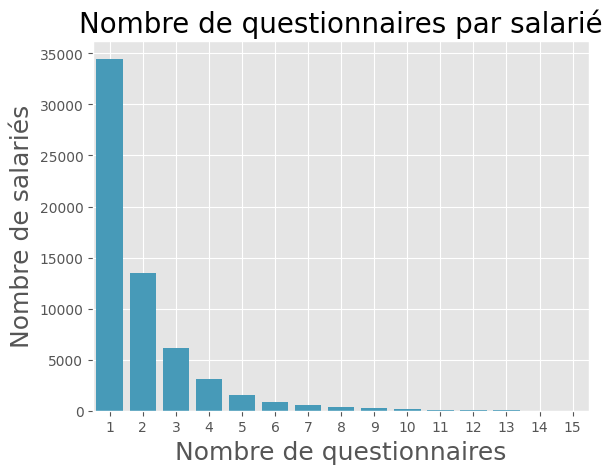

Nombre moyen de visites par salariés : 1.95
Nombre de salariés ayant participé une fois : 34475
Nombre de salariés ayant participé deux fois : 13474
Nombre de salariés ayant participé au moins deux fois : 26818
Nombre de salariés ayant participé trois fois : 6141
Nombre de salariés ayant participé plus de trois fois : 7203


In [4]:
visites_par_personne = df.groupby('cle')['cle'].count()

# Histogramme : nombre de personnes par nombre de visites
sns.countplot(x=visites_par_personne,color="#34a3cb")
plt.title("Nombre de questionnaires par salarié", fontsize=20)
plt.xlabel("Nombre de questionnaires", fontsize=18)
plt.ylabel("Nombre de salariés", fontsize=18)
plt.grid(True)
plt.savefig("Images/exploratory/nbvisites.png", dpi=300)
plt.show()

moyenne_visites = visites_par_personne.mean()
print(f"Nombre moyen de visites par salariés : {moyenne_visites:.2f}")

nombre_personnes_une_fois = (visites_par_personne == 1).sum()
print(f"Nombre de salariés ayant participé une fois : {nombre_personnes_une_fois}")

nombre_personnes_deux_fois = (visites_par_personne == 2).sum()
print(f"Nombre de salariés ayant participé deux fois : {nombre_personnes_deux_fois}")

nombre_personnes_au_moins_deux_fois = (visites_par_personne >1 ).sum()
print(f"Nombre de salariés ayant participé au moins deux fois : {nombre_personnes_au_moins_deux_fois}")

nombre_personnes_trois_fois = (visites_par_personne == 3).sum()
print(f"Nombre de salariés ayant participé trois fois : {nombre_personnes_trois_fois}")

nombre_personnes_plus_de_trois_fois = (visites_par_personne > 3).sum()
print(f"Nombre de salariés ayant participé plus de trois fois : {nombre_personnes_plus_de_trois_fois}")

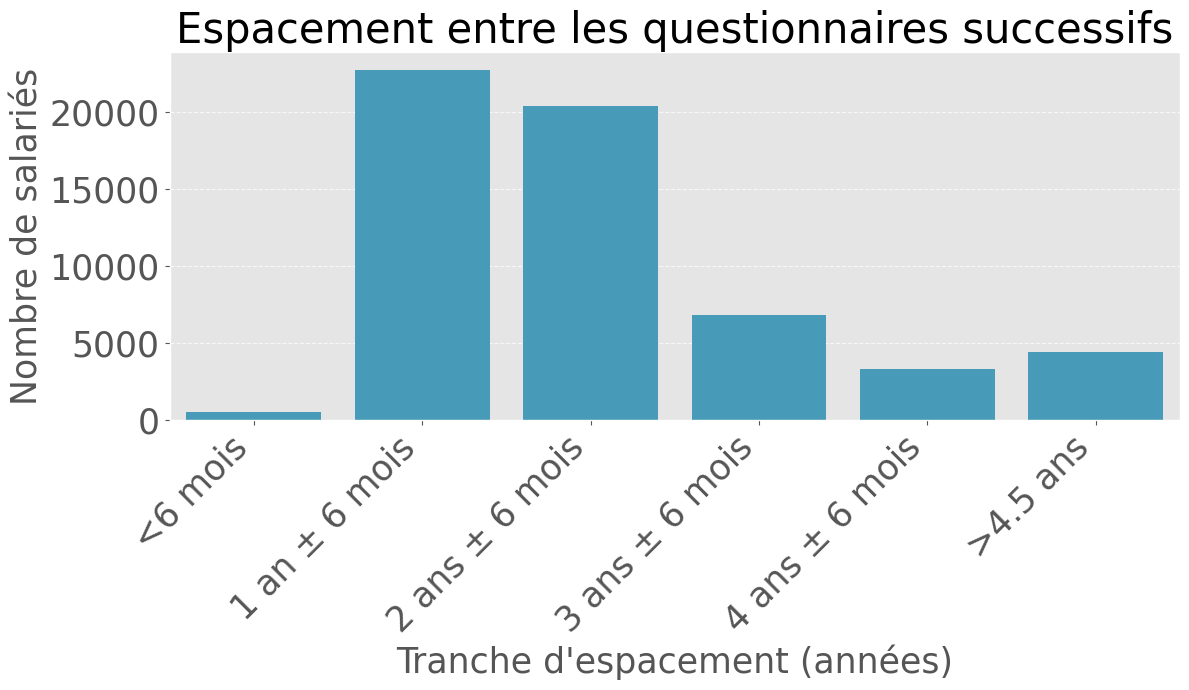

Comptage des intervalles par catégorie :
intervalle_categorie
<6 mois             546
1 an ± 6 mois     22752
2 ans ± 6 mois    20401
3 ans ± 6 mois     6821
4 ans ± 6 mois     3316
>4.5 ans           4432
Name: count, dtype: int64
Espacement moyen :
2.17


In [5]:
df2 = df.copy()
df2 = df2.sort_values(by=['cle', 'date_bilan'])
df2['date_bilan'] = pd.to_datetime(df2['date_bilan'])
df2['inter'] = df2.groupby('cle')['date_bilan'].diff().dt.days
df2['inter2'] = df2['inter'] / 365.25

# Définir les limites des intervalles en années
bins_categories = [0, 0.5, 1.5, 2.5, 3.5, 4.5, float('inf')] # <0.5 (6 mois), <1.5 (1 an et demi), etc.

# Définir les étiquettes pour chaque catégorie
labels_categories = [
    "<6 mois",
    "1 an ± 6 mois",
    "2 ans ± 6 mois",
    "3 ans ± 6 mois",
    "4 ans ± 6 mois",
    ">4.5 ans"
]

# Créer la nouvelle colonne catégorielle 'intervalle_categorie'
df2['intervalle_categorie'] = pd.cut(
    df2['inter2'],
    bins=bins_categories,
    labels=labels_categories,
    right=False
)

# Compter le nombre d'occurrences par catégorie
comptage_categories = df2['intervalle_categorie'].value_counts().sort_index()
comptage_categories = comptage_categories.reindex(labels_categories)


# Tracer le graphique
plt.figure(figsize=(12, 7))
sns.barplot(x=comptage_categories.index, y=comptage_categories.values, color="#34a3cb")

plt.title("Espacement entre les questionnaires successifs", fontsize=30)
plt.xlabel("Tranche d'espacement (années)", fontsize=25)
plt.ylabel("Nombre de salariés", fontsize=25)
plt.xticks(rotation=45, ha='right', fontsize=25)
plt.yticks(fontsize=25)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("Images/exploratory/espacementvisites.png")
plt.show()

print("Comptage des intervalles par catégorie :")
print(comptage_categories)
print("Espacement moyen :")
print(df2['inter2'].mean().round(2))

**On filtre pour ne regarder que les questionnaires unique les plus récents**

In [6]:
df2= df.sort_values('date_bilan').drop_duplicates(subset='cle', keep='last')

In [7]:
df2.shape

(61293, 442)

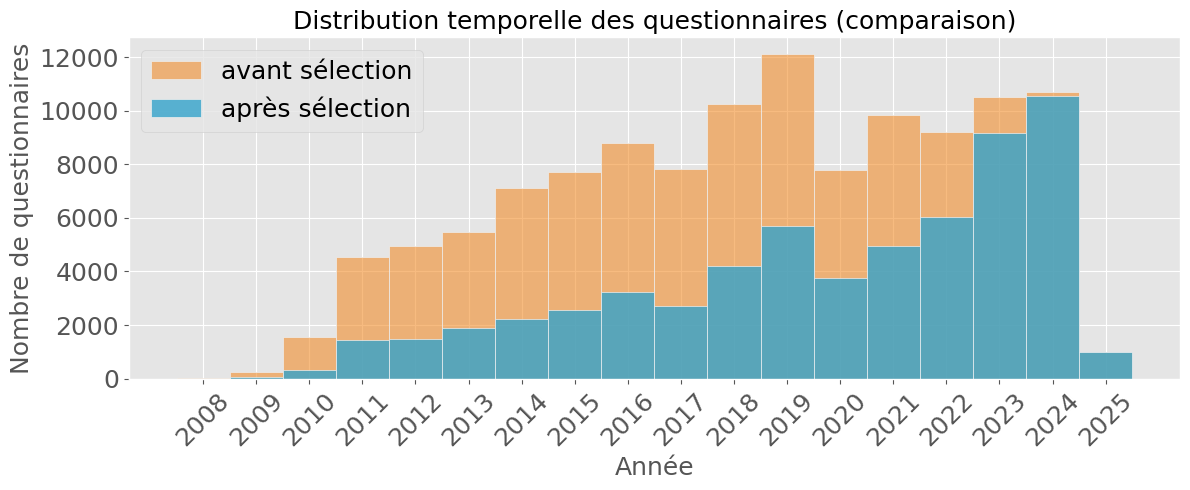

Counts for 'après filtre' dataset (df2):
date_bilan
2008        1
2009       45
2010      331
2011     1445
2012     1470
2013     1906
2014     2236
2015     2546
2016     3225
2017     2726
2018     4215
2019     5710
2020     3741
2021     4956
2022     6018
2023     9184
2024    10537
2025      989
Name: count, dtype: int64

Counts for 'avant filtre' dataset (df):
date_bilan
2008        5
2009      233
2010     1548
2011     4540
2012     4937
2013     5483
2014     7099
2015     7701
2016     8810
2017     7830
2018    10244
2019    12137
2020     7784
2021     9833
2022     9190
2023    10507
2024    10684
2025      990
Name: count, dtype: int64


In [8]:
df2['date_bilan'] = pd.to_datetime(df2['date_bilan'])
year1 = df2['date_bilan'].dt.year.dropna().astype(int)

df['date_bilan'] = pd.to_datetime(df['date_bilan'])
year2 = df['date_bilan'].dt.year.dropna().astype(int)

# Définir les bornes des années pour les bins
min_year = min(year1.min(), year2.min())
max_year = max(year1.max(), year2.max())

plt.figure(figsize=(12, 5))

sns.histplot(year2, bins=range(min_year, max_year + 2),
             kde=False, color="#f28e2c", label="avant sélection", alpha=0.6)

sns.histplot(year1, bins=range(min_year, max_year + 2),
             kde=False, color="#34a3cb", label="après sélection", alpha=0.8)

plt.title("Distribution temporelle des questionnaires (comparaison)", fontsize=18)
plt.xlabel("Année", fontsize=18)
plt.xticks(ticks=np.arange(min_year, max_year + 1, 1) + 0.5,
           labels=np.arange(min_year, max_year + 1, 1),
           rotation=45,
           fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Nombre de questionnaires", fontsize=18)
plt.legend(fontsize=18)
plt.tight_layout()
plt.savefig("Images/exploratory/distbilan2.png")
plt.show()

print("Counts for 'après filtre' dataset (df2):")
print(year1.value_counts().sort_index())

print("\nCounts for 'avant filtre' dataset (df):")
print(year2.value_counts().sort_index())

In [9]:
def categorie_socio_prof(pcs_code):
    if pd.isna(pcs_code):
        return 'Inconnu'
    pcs_code = str(pcs_code)
    if pcs_code.startswith('3'):
        return 'Cadre'
    elif pcs_code.startswith('4'):
        return 'Prof. interm'
    elif pcs_code.startswith('5'):
        return 'Employé'
    elif pcs_code.startswith('6'):
        return 'Ouvrier'

df2['Categorie'] = df2['pcs3'].apply(categorie_socio_prof)

# Comptes et moyenne d'âge
count_persons = df2.groupby('Categorie')['cle'].nunique().reset_index(name='Nb de personnes')
avg_age = df2.groupby('Categorie')['age'].mean().reset_index(name='Age moyen')
avg_age['Age moyen'] = pd.to_numeric(avg_age['Age moyen']).round().astype('Int64')

# Répartition par sexe
gender_counts_df = df2.groupby(['Categorie', 'sexe'])['cle'].nunique().unstack(fill_value=0).reset_index()
gender_counts_df.rename(columns={'M': 'Hommes', 'F': 'Femmes'}, inplace=True)

# Fusion
final_table = pd.merge(count_persons, avg_age, on='Categorie', how='left')

# Calcul des proportions homme/femme
final_table['% Hommes'] = (gender_counts_df['Hommes'] / final_table['Nb de personnes'] * 100).round(1)
final_table['% Femmes'] = (gender_counts_df['Femmes'] / final_table['Nb de personnes'] * 100).round(1)

# Pourcentage du total
total_persons = final_table['Nb de personnes'].sum()
final_table['% du total'] = (final_table['Nb de personnes'] / total_persons * 100).round(1)

# Tri final
desired_order = ['Cadre', 'Prof. interm', 'Employé', 'Ouvrier']
final_table['Categorie'] = pd.Categorical(final_table['Categorie'], categories=desired_order, ordered=True)
final_table = final_table.sort_values('Categorie')

# Affichage ---
print("---")
print("Tableau Récapitulatif par Catégorie Socio-Professionnelle")
print("---")
print(gender_counts_df)
print(final_table.to_string(index=False))

---
Tableau Récapitulatif par Catégorie Socio-Professionnelle
---
sexe     Categorie  Femmes  Hommes
0            Cadre    6773   17408
1          Employé    1211     941
2          Ouvrier     575    5524
3     Prof. interm    7277   21575
   Categorie  Nb de personnes  Age moyen  % Hommes  % Femmes  % du total
       Cadre            24181         45      72.0      28.0        39.5
Prof. interm            28852         43      74.8      25.2        47.1
     Employé             2152         42      43.7      56.3         3.5
     Ouvrier             6099         37      90.6       9.4        10.0


Nombre d'individus avant nettoyage des aberrants: 61293
Q1 (25ème percentile) de l'âge: 34.00
Q3 (75ème percentile) de l'âge: 52.00
IQR (Écart InterQuartile) de l'âge: 18.00
Limite inférieure pour les âges valides: 7.00
Limite supérieure pour les âges valides: 79.00
Nombre d'individus après suppression des aberrants: 61286
Nombre de valeurs aberrantes supprimées: 7


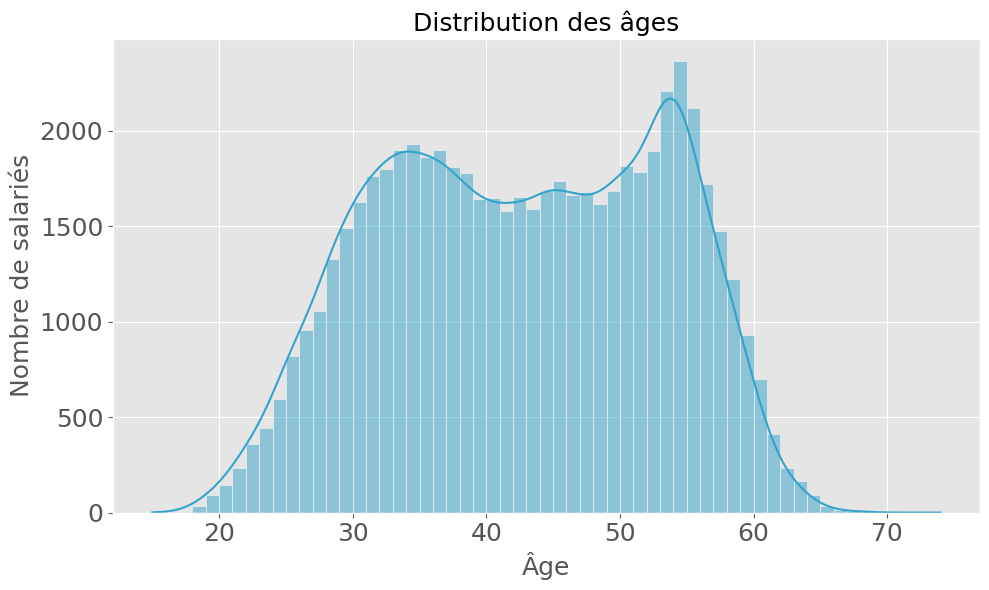

Moyenne d'âge : 42 ans


In [10]:
df_cleaned = df2.copy()
df_cleaned['age'] = df_cleaned['age'].dropna().astype(int)
# Calcul des quartiles
Q1 = df_cleaned['age'].quantile(0.25)
Q3 = df_cleaned['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned_no_outliers = df_cleaned[(df_cleaned['age'] >= lower_bound) & (df_cleaned['age'] <= upper_bound)]

print(f"Nombre d'individus avant nettoyage des aberrants: {len(df_cleaned)}")
print(f"Q1 (25ème percentile) de l'âge: {Q1:.2f}")
print(f"Q3 (75ème percentile) de l'âge: {Q3:.2f}")
print(f"IQR (Écart InterQuartile) de l'âge: {IQR:.2f}")
print(f"Limite inférieure pour les âges valides: {lower_bound:.2f}")
print(f"Limite supérieure pour les âges valides: {upper_bound:.2f}")
print(f"Nombre d'individus après suppression des aberrants: {len(df_cleaned_no_outliers)}")
print(f"Nombre de valeurs aberrantes supprimées: {len(df_cleaned) - len(df_cleaned_no_outliers)}")

# Visualisation de la distribution des âges nettoyée
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_no_outliers['age'], binwidth=1, kde=True, color='#34a3cb')
plt.title("Distribution des âges", fontsize=18)
plt.xlabel("Âge", fontsize=18)
plt.ylabel("Nombre de salariés", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig("Images/exploratory/distage.png")
plt.show()

# Affichage de la nouvelle moyenne d'âge
moyenne_age_nettoyee = df_cleaned_no_outliers['age'].mean()
print(f"Moyenne d'âge : {moyenne_age_nettoyee:.0f} ans")